# What does vars actually do in Metropolis sampler

In [7]:
import pymc3 as pm
import arviz as az
import numpy as np

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f178cf405f8>],
      dtype=object)

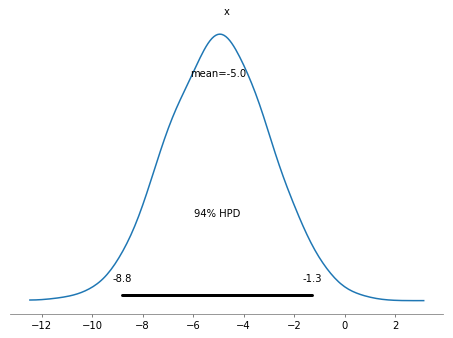

In [8]:
# Generate Gaussian
obs = np.random.normal(loc=-5, scale=2, size=10000)
az.plot_posterior(obs)

# Nothing passed to var

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [mu]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:01<00:00, 6984.31draws/s]
The number of effective samples is smaller than 10% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1786081978>,
      dtype=object)

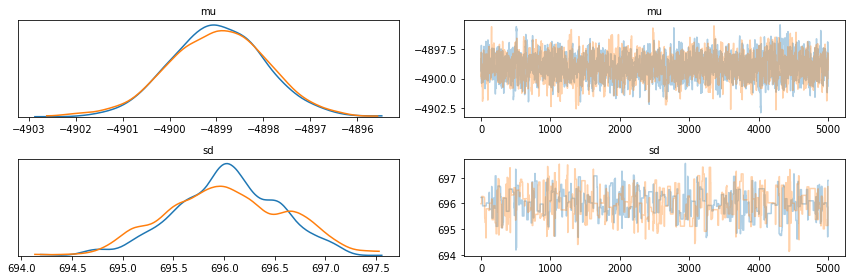

In [9]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=-5000, sd=1)
    sd = pm.HalfNormal("sd", sd=1)
    y = pm.Normal("y", mu=mu, sd=sd, observed=obs)
    step = pm.Metropolis()
    trace = pm.sample(5000, step, chains=2)

az.plot_trace(trace)

# Something passed to var


Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [mu]
>NUTS: [sd]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:04<00:00, 2584.81draws/s]
There were 1099 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9280206525703243, but should be close to 0.8. Try to increase the number of tuning steps.
There were 988 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9371292844485538, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f177b2a9588>,
      dtype=object)

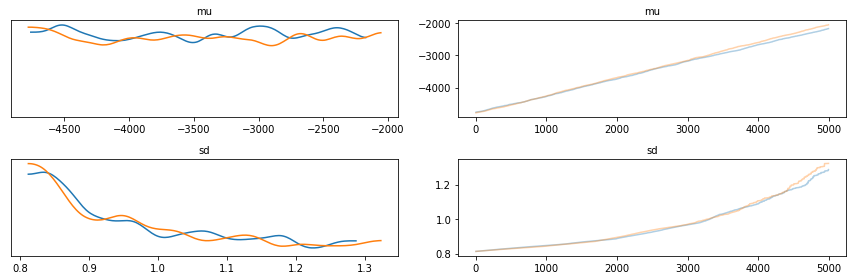

In [10]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=-5000, sd=1)
    sd = pm.HalfNormal("sd", sd=1)
    y = pm.Normal("y", mu=mu, sd=sd, observed=obs)
    step = pm.Metropolis(vars=(mu,))
    trace = pm.sample(5000, step, chains=2)
az.plot_trace(trace)